In [ ]:
pip install pandas openai transformers plotly matplotlib scikit-learn torch torchvision scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.6 MB/s eta 0:00:00


In [ ]:
with open('steve jobs book.txt', 'r') as f:
        text = f.read().replace('\n', ' ')

In [ ]:
len(text)

257415

In [ ]:
import pandas as pd
from collections import deque

def split_text(file_name, chunk_size, overlap):
    with open(file_name, 'r') as f:
        text = f.read().replace('\n', ' ')

    fragments = []
    chunk = deque(maxlen=chunk_size)
    overlap_buffer = []

    for char in text:
        chunk.append(char)
        if len(chunk) == chunk_size:
            chunk_str = ''.join(chunk)
            sentence_end = max(chunk_str.rfind(s) for s in {'.', '!', '?'})
            if sentence_end == -1:  # no sentence delimiter found
                sentence_end = chunk_size - 1
            else:
                sentence_end += 1  # include the sentence delimiter
            fragments.append(''.join(list(chunk)[:sentence_end]))
            overlap_buffer = list(chunk)[sentence_end-overlap:sentence_end]
            chunk = deque(overlap_buffer, maxlen=chunk_size)

    # add the remaining text (if any)
    if chunk and ''.join(chunk) != fragments[-1]:
        fragments.append(''.join(chunk))

    return fragments

file_name = 'steve jobs book.txt'  # replace with your file name
chunk_size = 1200
overlap = 400

fragments = split_text(file_name, chunk_size, overlap)

# Create DataFrame
df = pd.DataFrame(fragments, columns=['Text'])

print(df)


                                                  Text
0    ﻿Make Something Wonderful Steve Jobs in his ow...
1    who we are and remember what’s really importan...
2    ing time. He was compelled by the notion of be...
3    verything that makes up what we call life was ...
4     Smithsonian. I was very lucky. I had a father...
..                                                 ...
317  t Office for Mac. When the audience begins hec...
318  ism crashes. The NASDAQ loses nearly $1 trilli...
319  ou love.”   Apple opens the iTunes Music Store...
320  s it “the most revolutionary and exciting prod...
321  ur own things that other people can use.   And...

[322 rows x 1 columns]


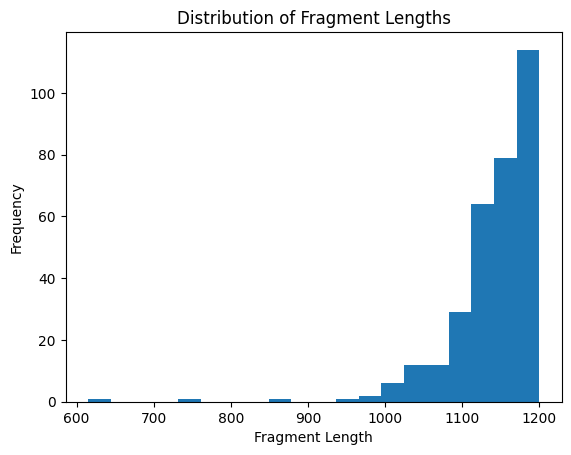

In [ ]:
import matplotlib.pyplot as plt
lengths = df['Text'].str.len()
plt.hist(lengths, bins=20)
plt.title('Distribution of Book Fragment Lengths')
plt.xlabel('Fragment Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import tiktoken

from openai.embeddings_utils import get_embedding
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [ ]:
encoding = tiktoken.get_encoding(embedding_encoding)


In [ ]:
df["n_tokens"] = df.Text.apply(lambda x: len(encoding.encode(x)))
len(df)

322

In [ ]:
import openai

In [ ]:
openai.api_key = "INSERT YOUR KEY HERE"

In [ ]:
df["embedding"] = df.Text.apply(lambda x: get_embedding(x, engine=embedding_model))

In [ ]:
df.to_csv("steveJobs1200charchunks_with_embeddings_1k.csv")